# Working with Classification Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to visualize the structure of a Classification Tree
+ How to Prune a Classification Tree 

## 1. Collect the Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
loan = pd.read_csv('./data/loan.csv')
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


## 2. Explore the Data

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [5]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,30.0,18.766667,8.572946,5.0,13.00,18.0,25.5,34.0
Loan Amount,30.0,51.966667,34.055212,8.0,21.25,49.0,79.5,110.0


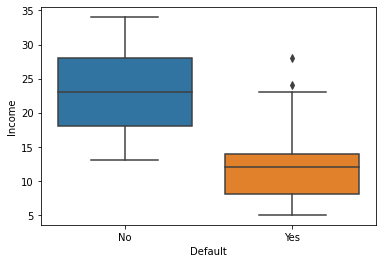

In [10]:
ax = sns.boxplot(x='Default', y='Income', data=loan);

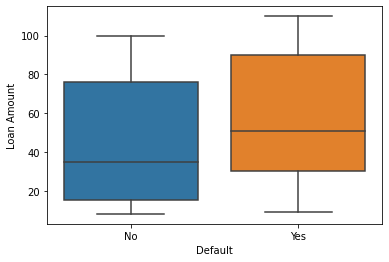

In [11]:
ax = sns.boxplot(x='Default', y='Loan Amount', data=loan);

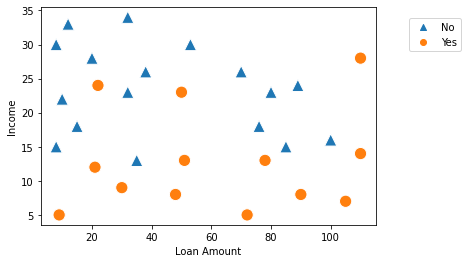

In [30]:
ax = sns.scatterplot(data=loan,
               x='Loan Amount',
               y='Income',
               hue='Default',
               style='Default',
               markers=['^', 'o'],
                s=150);

ax = plt.legend(loc=(1.1,0.8))

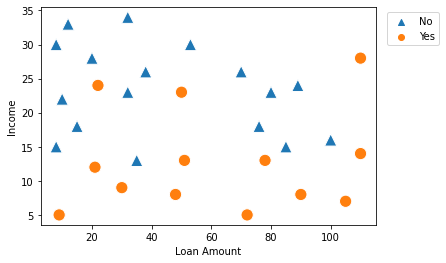

In [31]:
ax = sns.scatterplot(data = loan, 
                     x = 'Loan Amount', 
                     y = 'Income', 
                     hue = 'Default', 
                     style = 'Default', 
                     markers = ['^','o'], 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

## 3. Prepare the Data

In [32]:
# separate lables and features
X = loan.drop('Default', axis=1)
y = loan['Default']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=1234)

In [34]:
X_train.shape, X_test.shape

((24, 2), (6, 2))

## 4. Train and Evaluate the Classification Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model = DecisionTreeClassifier(random_state=1234)

In [41]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [43]:
model.score(X_test, y_test)

0.5

## 5. Visualize the Classification Tree

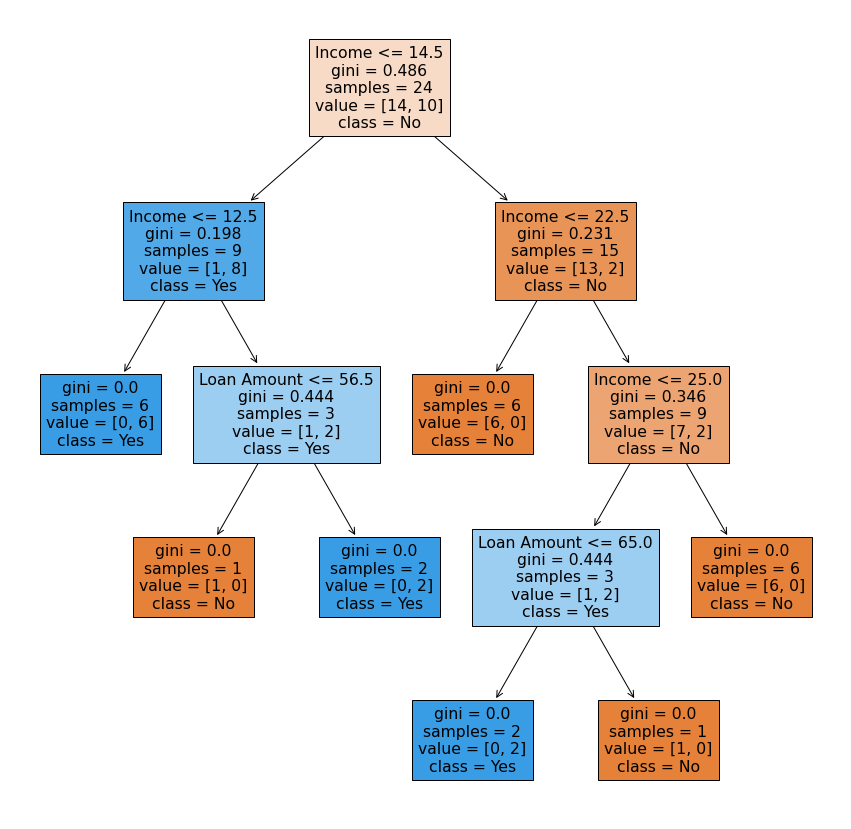

In [48]:
from sklearn import tree

feature_names = X.columns
class_names = y.unique()

plt.figure(figsize=(15, 15))
tree.plot_tree(model,
             feature_names=feature_names,
             class_names=class_names,
             filled=True);

### Feature Importances

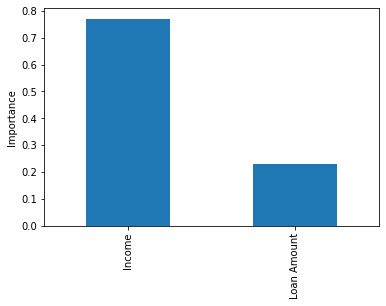

In [52]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns)

feature_importance.plot(kind='bar')
plt.ylabel('Importance');

We can see taht `Income` feature is much more important than `Loan Amount`.

## 6. Prune the Classification Tree

### Evaluation: Overfit or not - based on Score

In [57]:
training_score = model.score(X_train, y_train)
training_score

1.0

In [58]:
testing_score = model.score(X_test, y_test)
testing_score

0.5

Our model is overfitted. So need to be purned !

### Approach 1) Pre-Prunning - using Parameters (Create New Model)

In [59]:
parameters = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 3, 4], # Studies show 1 - 40 is the best
    'min_samples_leaf': [1, 2, 3, 4, 5, 6] # Studies show 1 - 20 is the best 
}

In [60]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()
gcv = GridSearchCV(estimator = classifier, 
                   param_grid = parameters)

gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [63]:
gcv.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6)

In [64]:
model = gcv.best_estimator_ # get the best estimator of Grid Search CV
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6)

In [65]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print('Training Score: ', training_score)
print('Testing Score: ', testing_score)

Training Score:  0.875
Testing Score:  0.8333333333333334


We can see that the score has been improved.

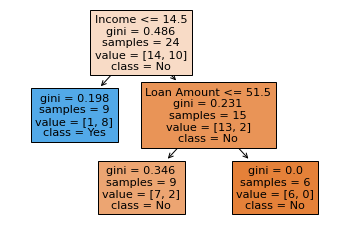

In [72]:
from sklearn import tree

feature_names = list(X.columns) 
class_names = y.unique()

tree.plot_tree(model, 
              feature_names=feature_names,
              class_names=class_names,
              filled=True);